In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_factorized = pd.read_csv('clas6/CLAS6_factorized.txt')
df_factorized.head()


,rc_type,xs_type,rs,x,z,Q,qT_Q,xs,xs_err
0,born,unpol,3.4,0.3,0.37,1.55,0.1,0.001247,9.622168e-09
1,born,unpol,3.4,0.3,0.37,1.55,0.2,0.001186,2.235792e-08
2,born,unpol,3.4,0.3,0.37,1.55,0.3,0.001091,1.683484e-08
3,born,unpol,3.4,0.3,0.37,1.55,0.4,0.000970,3.135402e-08
4,born,unpol,3.4,0.3,0.37,1.55,0.5,0.000834,3.312459e-08


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_67808/1083308668.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zs_factorized = df_factorized[df_factorized['Q']==1.55][df_factorized['x']==0.3][df_factorized['qT_Q']==0.85]['z']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_67808/1083308668.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  xs_born_factorized =  df_factorized[df_factorized['rc_type']=='born'][df_factorized['Q']==1.55][df_factorized['x']==0.3][df_factorized['qT_Q']==0.85]['xs']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_67808/1083308668.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  xs_rc_factorized =  df_factorized[df_factorized['rc_type']=='rc'][df_factorized['Q']==1.54][df_factorized['x']==0.302500][df_factorized['qT_Q']==0.85]['xs']


Text(0.5, 0, 'z')

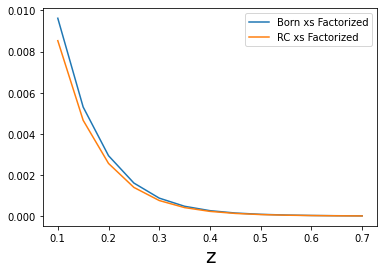

In [3]:
Factor =1e6
#Factor = 5.1782e10/(2099*2*3.14)
#Factor = 1/5.1782e10
zs_factorized = df_factorized[df_factorized['Q']==1.55][df_factorized['x']==0.3][df_factorized['qT_Q']==0.85]['z']
xs_born_factorized =  df_factorized[df_factorized['rc_type']=='born'][df_factorized['Q']==1.55][df_factorized['x']==0.3][df_factorized['qT_Q']==0.85]['xs']
xs_rc_factorized =  df_factorized[df_factorized['rc_type']=='rc'][df_factorized['Q']==1.54][df_factorized['x']==0.302500][df_factorized['qT_Q']==0.85]['xs']
plt.plot(zs_factorized,xs_born_factorized,'-',label='Born xs Factorized')
plt.plot(zs_factorized,xs_rc_factorized,'-',label='RC xs Factorized')
plt.legend()
plt.xlabel('z',fontsize=20)

In [4]:
df_traditional = pd.read_csv('clas6/out_clas6_born.txt',delim_whitespace=True,skiprows=[0])
df_traditional.head()



,z,yield
0,0.005,0.0
1,0.015,0.0
2,0.025,0.0
3,0.035,0.0
4,0.045,0.0


In [5]:
df_traditional_rc = pd.read_csv('clas6/out_clas6_rc.txt',delim_whitespace=True,skiprows=[0])
df_traditional_rc.head()

,z,yield
0,0.005,0.0
1,0.015,0.0
2,0.025,0.0
3,0.035,0.0
4,0.045,0.0


1.088657975424


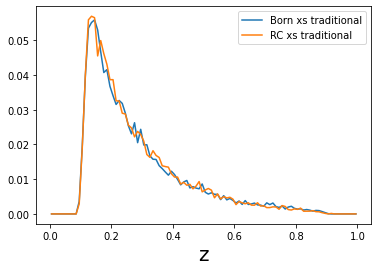

In [6]:
zs_traditional = df_traditional['z']
xs_born_traditional =  df_traditional['yield']

zs_rc_traditional = df_traditional_rc['z']
xs_rc_traditional =  df_traditional_rc['yield']

plt.plot(zs_traditional,np.asarray(xs_born_traditional)*Factor,'-',label='Born xs traditional')
plt.plot(zs_rc_traditional,np.asarray(xs_rc_traditional)*Factor,'-',label='RC xs traditional')
plt.legend()
plt.xlabel('z',fontsize=20)
print(df_traditional_rc['yield'].sum()*Factor)

#plt.plot(zs_factorized,xs_born_factorized,'-',label='Born xs Factorized')
#plt.plot(zs_factorized,xs_rc_factorized,'-',label='RC xs Factorized')

plt.savefig('clas6/traditional_z.pdf')

Text(0.5, 0, 'z')

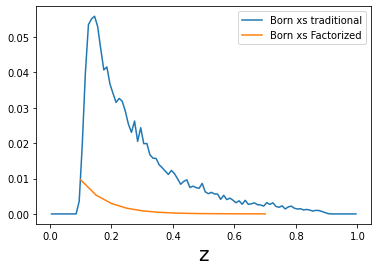

In [7]:
plt.plot(zs_traditional,np.asarray(xs_born_traditional)*Factor,'-',label='Born xs traditional')
plt.plot(zs_factorized,xs_born_factorized,'-',label='Born xs Factorized')

#plt.xlim(0.3,0.7)
#plt.ylim(0,0.001)
plt.legend()
plt.xlabel('z',fontsize=20)

In [8]:
clas6_data = pd.read_csv('clas6/CLAS6.txt', delim_whitespace=True)
clas6_data.head()

,Q2,x,z,pT2,phi,ds_dxdQ2dzdpT2dphi,stat_err,sys_err,rad_cor
0,1.49,0.1468,0.0682,0.0049,170.0,4.1352,1.35320,11.52000,1.1437
1,1.49,0.1468,0.0682,0.0049,190.0,4.1789,1.31050,11.64200,1.1437
2,1.49,0.1468,0.0682,0.0259,10.0,2.9908,0.23221,0.37804,1.0944
3,1.49,0.1468,0.0682,0.0259,30.0,2.8394,0.73036,0.35845,1.1008
4,1.49,0.1468,0.0682,0.0259,50.0,2.6473,0.15669,0.33415,1.1139


In [9]:
#For Q2=2.4,x=0.3,z =0.37,pt2=0.22, this part is for z from 0.1 to 1
#The accurate value is Q2=2.37, x = 0.3025
df1=clas6_data[clas6_data['Q2']==2.37][clas6_data['x']==0.3025][clas6_data['pT2']==0.2165]
df1

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_67808/1425309737.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1=clas6_data[clas6_data['Q2']==2.37][clas6_data['x']==0.3025][clas6_data['pT2']==0.2165]


,Q2,x,z,pT2,phi,ds_dxdQ2dzdpT2dphi,stat_err,sys_err,rad_cor
42366,2.37,0.3025,0.1194,0.2165,10.0,0.013950,0.000587,0.002209,0.9696
42367,2.37,0.3025,0.1194,0.2165,30.0,0.012558,0.000671,0.001987,0.9720
42368,2.37,0.3025,0.1194,0.2165,50.0,0.012321,0.000531,0.001949,0.9772
42369,2.37,0.3025,0.1194,0.2165,70.0,0.012308,0.000579,0.001947,0.9862
42370,2.37,0.3025,0.1194,0.2165,90.0,0.014383,0.000733,0.002275,1.0001
...,...,...,...,...,...,...,...,...,...
44447,2.37,0.3025,0.8469,0.2165,170.0,0.000304,0.000186,0.000171,1.0405
44448,2.37,0.3025,0.8469,0.2165,190.0,0.000533,0.000427,0.000300,1.0405
44449,2.37,0.3025,0.8469,0.2165,210.0,0.002555,0.002857,0.001438,1.0397
44450,2.37,0.3025,0.8469,0.2165,230.0,0.000581,0.000486,0.000327,1.0342


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_67808/3984902026.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  xs = df1[df1['z']==i_z][df1['phi']==i_phi]['ds_dxdQ2dzdpT2dphi']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_67808/3984902026.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rc = df1[df1['z']==i_z][df1['phi']==i_phi]['rad_cor']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_67808/3984902026.py:35: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(zs_axis,xs_before_axis,'o',marker = 'v',color='red',label='No correction')


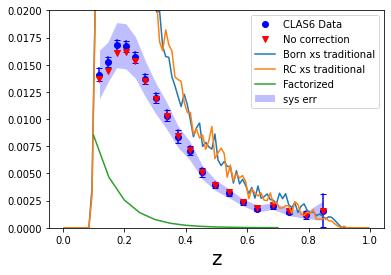

In [10]:

zs = df1['z'].unique()
zs_axis=[]
xs_axis=[]
xs_before_axis=[]
xs_stat_err_axis=[]
xs_sys_err_axis=[]
fig = plt.figure()
ax = fig.add_subplot()
for i_z in zs:
    #print(i_z)
    #print(df1[df1['z']==i_z])#['ds_dxdQ2dzdpT2dphi'])
    phis = df1[df1['z']==i_z]['phi']
    xs_phis = []
    xs_before_phis = []
    for i_phi in phis:
        xs = df1[df1['z']==i_z][df1['phi']==i_phi]['ds_dxdQ2dzdpT2dphi']
        rc = df1[df1['z']==i_z][df1['phi']==i_phi]['rad_cor']
        xs_phis.append(xs)
        xs_before_phis.append(xs/rc)
    #rc = df1[df1['z']==i_z]['rad_cor']
    xs = np.mean(xs_phis)
    xs_before = np.mean(xs_before_phis)
    #print(xs)
    xs_stat_err = df1[df1['z']==i_z]['stat_err'].mean()
    xs_sys_err = df1[df1['z']==i_z]['sys_err'].mean()
    zs_axis.append(i_z)
    xs_axis.append(xs)
    xs_before_axis.append(xs_before)
    xs_stat_err_axis.append(xs_stat_err)
    xs_sys_err_axis.append(xs_sys_err)
    ax.plot([i_z,i_z],[xs-xs_stat_err,xs+xs_stat_err],color='blue',marker='_')

ax.fill_between(zs_axis,np.asarray(xs_axis)-np.asarray(xs_sys_err_axis),np.asarray(xs_axis)+np.asarray(xs_sys_err_axis),color='blue',alpha=0.25,linewidth=0,label='sys err')
plt.plot(zs_axis,xs_axis,'o',color='blue',label='CLAS6 Data')
plt.plot(zs_axis,xs_before_axis,'o',marker = 'v',color='red',label='No correction')
plt.xlabel('z',fontsize=20)


plt.plot(zs_traditional,np.asarray(xs_born_traditional)*Factor,'-',label='Born xs traditional')
plt.plot(zs_rc_traditional,np.asarray(xs_rc_traditional)*Factor,'-',label='RC xs traditional')
plt.plot(zs_factorized,xs_rc_factorized,'-',label='Factorized')
#plt.xlim(0.3,0.7)
plt.ylim(0,0.02)
plt.legend()

plt.savefig('clas6/compare_z.pdf')

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_67808/1751751226.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  xs = df1[df1['z']==i_z][df1['phi']==i_phi]['ds_dxdQ2dzdpT2dphi']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_67808/1751751226.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rc = df1[df1['z']==i_z][df1['phi']==i_phi]['rad_cor']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_67808/1751751226.py:35: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(zs_axis,xs_before_axis,'o',marker = 'v',color='red',label='No correction')


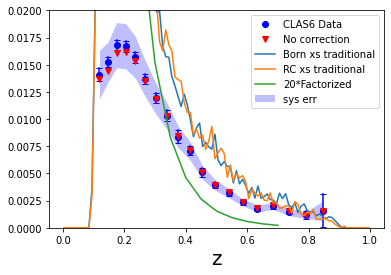

In [11]:

zs = df1['z'].unique()
zs_axis=[]
xs_axis=[]
xs_before_axis=[]
xs_stat_err_axis=[]
xs_sys_err_axis=[]
fig = plt.figure()
ax = fig.add_subplot()
for i_z in zs:
    #print(i_z)
    #print(df1[df1['z']==i_z])#['ds_dxdQ2dzdpT2dphi'])
    phis = df1[df1['z']==i_z]['phi']
    xs_phis = []
    xs_before_phis = []
    for i_phi in phis:
        xs = df1[df1['z']==i_z][df1['phi']==i_phi]['ds_dxdQ2dzdpT2dphi']
        rc = df1[df1['z']==i_z][df1['phi']==i_phi]['rad_cor']
        xs_phis.append(xs)
        xs_before_phis.append(xs/rc)
    #rc = df1[df1['z']==i_z]['rad_cor']
    xs = np.mean(xs_phis)
    xs_before = np.mean(xs_before_phis)
    #print(xs)
    xs_stat_err = df1[df1['z']==i_z]['stat_err'].mean()
    xs_sys_err = df1[df1['z']==i_z]['sys_err'].mean()
    zs_axis.append(i_z)
    xs_axis.append(xs)
    xs_before_axis.append(xs_before)
    xs_stat_err_axis.append(xs_stat_err)
    xs_sys_err_axis.append(xs_sys_err)
    ax.plot([i_z,i_z],[xs-xs_stat_err,xs+xs_stat_err],color='blue',marker='_')

ax.fill_between(zs_axis,np.asarray(xs_axis)-np.asarray(xs_sys_err_axis),np.asarray(xs_axis)+np.asarray(xs_sys_err_axis),color='blue',alpha=0.25,linewidth=0,label='sys err')
plt.plot(zs_axis,xs_axis,'o',color='blue',label='CLAS6 Data')
plt.plot(zs_axis,xs_before_axis,'o',marker = 'v',color='red',label='No correction')
plt.xlabel('z',fontsize=20)


plt.plot(zs_traditional,np.asarray(xs_born_traditional)*Factor,'-',label='Born xs traditional')
plt.plot(zs_rc_traditional,np.asarray(xs_rc_traditional)*Factor,'-',label='RC xs traditional')
plt.plot(zs_factorized,20*xs_rc_factorized,'-',label='20*Factorized')
#plt.xlim(0.3,0.7)
plt.ylim(0,0.02)
plt.legend()

plt.savefig('clas6/compare_z_20.pdf')

2.440242591876209e-22


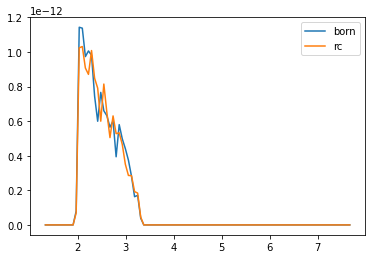

In [12]:
df_born_Q2_traditional=pd.read_csv('clas6/out_clas6_born_Q2.txt',delim_whitespace=True,skiprows=[0])
df_born_Q2_traditional.head()
df_rc_Q2_traditional=pd.read_csv('clas6/out_clas6_rc_Q2.txt',delim_whitespace=True,skiprows=[0])
df_rc_Q2_traditional.head()

Q2s_born_traditional = df_born_Q2_traditional['Q2']
xss_Q2_born_traditional = df_born_Q2_traditional['yield']
Q2s_rc_traditional = df_rc_Q2_traditional['Q2']
xss_Q2_rc_traditional = df_rc_Q2_traditional['yield']

plt.plot(Q2s_born_traditional,xss_Q2_born_traditional,label = 'born')
plt.plot(Q2s_rc_traditional,xss_Q2_rc_traditional,label = 'rc')
plt.legend()
print(df_rc_Q2_traditional['yield'].sum()/5.17e10)

In [13]:
#For Q2=2.4,x=0.3,z =0.37,pt2=0.22, this part is for Q2 from 1.6 to 3.2
#The accurate value is Q2=2.37, x = 0.3025,z = 0.3748
df_Q2=clas6_data[clas6_data['z']==0.3748][clas6_data['x']==0.3025][clas6_data['pT2']==0.2165]
df_Q2


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_67808/2689553817.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_Q2=clas6_data[clas6_data['z']==0.3748][clas6_data['x']==0.3025][clas6_data['pT2']==0.2165]


,Q2,x,z,pT2,phi,ds_dxdQ2dzdpT2dphi,stat_err,sys_err,rad_cor
12803,1.74,0.3025,0.3748,0.2165,10.0,0.015876,0.008506,0.002292,0.9227
12804,1.74,0.3025,0.3748,0.2165,30.0,0.021707,0.003177,0.003132,0.9282
12805,1.74,0.3025,0.3748,0.2165,50.0,0.005266,0.005390,0.000760,0.9396
12806,1.74,0.3025,0.3748,0.2165,70.0,0.016715,0.002372,0.002411,0.9555
12807,1.74,0.3025,0.3748,0.2165,90.0,0.018791,0.002161,0.002710,0.9729
...,...,...,...,...,...,...,...,...,...
57652,2.93,0.3025,0.3748,0.2165,270.0,0.004801,0.000250,0.000574,1.0032
57653,2.93,0.3025,0.3748,0.2165,290.0,0.004611,0.000429,0.000551,0.9933
57654,2.93,0.3025,0.3748,0.2165,310.0,0.005371,0.000442,0.000642,0.9853
57655,2.93,0.3025,0.3748,0.2165,330.0,0.004979,0.000495,0.000595,0.9798


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_67808/3523289542.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  xs = df_Q2[df_Q2['Q2']==i_Q2][df_Q2['phi']==i_phi]['ds_dxdQ2dzdpT2dphi']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_67808/3523289542.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rc = df_Q2[df_Q2['Q2']==i_Q2][df_Q2['phi']==i_phi]['rad_cor']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_67808/3523289542.py:34: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(Q2s_axis,xs_before_axis,'o',marker = 'v',color='red',label='No correction')


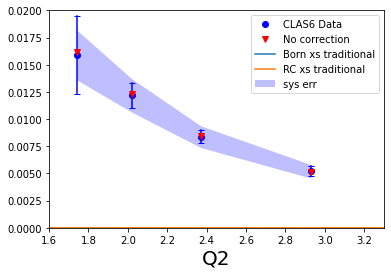

In [14]:

Q2s = df_Q2['Q2'].unique()
Q2s_axis=[]
xs_axis=[]
xs_before_axis=[]
xs_stat_err_axis=[]
xs_sys_err_axis=[]
fig = plt.figure()
ax = fig.add_subplot()
for i_Q2 in Q2s:
    
    phis = df_Q2[df_Q2['Q2']==i_Q2]['phi']
    xs_phis = []
    xs_before_phis = []
    for i_phi in phis:
        xs = df_Q2[df_Q2['Q2']==i_Q2][df_Q2['phi']==i_phi]['ds_dxdQ2dzdpT2dphi']
        rc = df_Q2[df_Q2['Q2']==i_Q2][df_Q2['phi']==i_phi]['rad_cor']
        xs_phis.append(xs)
        xs_before_phis.append(xs/rc)
    #rc = df_Q2[df_Q2['z']==i_z]['rad_cor']
    xs = np.mean(xs_phis)
    xs_before = np.mean(xs_before_phis)
    #print(xs)
    xs_stat_err = df_Q2[df_Q2['Q2']==i_Q2]['stat_err'].mean()
    xs_sys_err = df_Q2[df_Q2['Q2']==i_Q2]['sys_err'].mean()
    Q2s_axis.append(i_Q2)
    xs_axis.append(xs)
    xs_before_axis.append(xs_before)
    xs_stat_err_axis.append(xs_stat_err)
    xs_sys_err_axis.append(xs_sys_err)
    ax.plot([i_Q2,i_Q2],[xs-xs_stat_err,xs+xs_stat_err],color='blue',marker='_')

ax.fill_between(Q2s_axis,np.asarray(xs_axis)-np.asarray(xs_sys_err_axis),np.asarray(xs_axis)+np.asarray(xs_sys_err_axis),color='blue',alpha=0.25,linewidth=0,label='sys err')
plt.plot(Q2s_axis,xs_axis,'o',color='blue',label='CLAS6 Data')
plt.plot(Q2s_axis,xs_before_axis,'o',marker = 'v',color='red',label='No correction')
plt.xlabel('Q2',fontsize=20)


plt.plot(Q2s_born_traditional,np.asarray(xss_Q2_born_traditional)*Factor,'-',label='Born xs traditional')
plt.plot(Q2s_rc_traditional,np.asarray(xss_Q2_rc_traditional)*Factor,'-',label='RC xs traditional')
#plt.plot(Q2s_factorized,xs_rc_factorized,'-',label='Factorized')
plt.xlim(1.6,3.3)
plt.ylim(0,0.02)
plt.legend()

plt.savefig('clas6/compare_Q2.pdf')

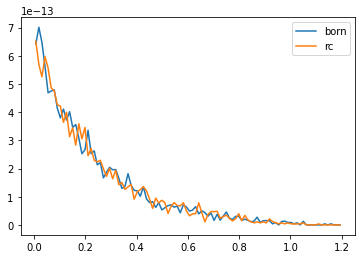

In [15]:
df_born_pT2_traditional=pd.read_csv('clas6/out_clas6_born_pT2.txt',delim_whitespace=True)
df_born_pT2_traditional.head()
df_rc_pT2_traditional=pd.read_csv('clas6/out_clas6_rc_pT2.txt',delim_whitespace=True)
df_rc_pT2_traditional.head()

pT2s_born_traditional = df_born_pT2_traditional['pT2']
xss_pT2_born_traditional = df_born_pT2_traditional['yield']
pT2s_rc_traditional = df_rc_pT2_traditional['pT2']
xss_pT2_rc_traditional = df_rc_pT2_traditional['yield']

plt.plot(pT2s_born_traditional,xss_pT2_born_traditional,label = 'born')
plt.plot(pT2s_rc_traditional,xss_pT2_rc_traditional,label = 'rc')
plt.legend()

In [16]:
#For Q2=2.4,x=0.3,z =0.37,pt2=0.22, this part is for Q2 from 1.6 to 3.2
#The accurate value is Q2=2.37, x = 0.3025,z = 0.3748
df_pT2=clas6_data[clas6_data['z']==0.3748][clas6_data['x']==0.3025][clas6_data['Q2']==2.37]
df_pT2


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_67808/3751334471.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pT2=clas6_data[clas6_data['z']==0.3748][clas6_data['x']==0.3025][clas6_data['Q2']==2.37]


,Q2,x,z,pT2,phi,ds_dxdQ2dzdpT2dphi,stat_err,sys_err,rad_cor
43204,2.37,0.3025,0.3748,0.0049,10.0,0.017539,0.006962,0.002361,0.9819
43205,2.37,0.3025,0.3748,0.0049,30.0,0.022171,0.007104,0.002983,0.9829
43206,2.37,0.3025,0.3748,0.0049,50.0,0.014526,0.004196,0.001954,0.9847
43207,2.37,0.3025,0.3748,0.0049,70.0,0.015229,0.003746,0.002048,0.9872
43208,2.37,0.3025,0.3748,0.0049,90.0,0.019377,0.003275,0.002607,0.9902
...,...,...,...,...,...,...,...,...,...
43329,2.37,0.3025,0.3748,0.7427,270.0,0.000398,0.000048,0.000049,0.9924
43330,2.37,0.3025,0.3748,0.7427,290.0,0.000350,0.000052,0.000044,0.9609
43331,2.37,0.3025,0.3748,0.7427,310.0,0.000338,0.000042,0.000042,0.9409
43332,2.37,0.3025,0.3748,0.7427,330.0,0.000342,0.000057,0.000043,0.9291


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_67808/110951878.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  xs = df_pT2[df_pT2['pT2']==i_pT2][df_pT2['phi']==i_phi]['ds_dxdQ2dzdpT2dphi']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_67808/110951878.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rc = df_pT2[df_pT2['pT2']==i_pT2][df_pT2['phi']==i_phi]['rad_cor']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_67808/110951878.py:34: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(pT2s_axis,xs_before_axis,'o',marker = 'v',color='red',label='No correction')


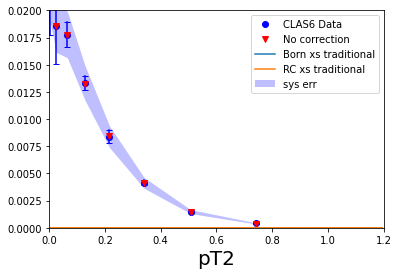

In [17]:

pT2s = df_pT2['pT2'].unique()
pT2s_axis=[]
xs_axis=[]
xs_before_axis=[]
xs_stat_err_axis=[]
xs_sys_err_axis=[]
fig = plt.figure()
ax = fig.add_subplot()
for i_pT2 in pT2s:
    
    phis = df_pT2[df_pT2['pT2']==i_pT2]['phi']
    xs_phis = []
    xs_before_phis = []
    for i_phi in phis:
        xs = df_pT2[df_pT2['pT2']==i_pT2][df_pT2['phi']==i_phi]['ds_dxdQ2dzdpT2dphi']
        rc = df_pT2[df_pT2['pT2']==i_pT2][df_pT2['phi']==i_phi]['rad_cor']
        xs_phis.append(xs)
        xs_before_phis.append(xs/rc)
    #rc = df_pT2[df_pT2['z']==i_z]['rad_cor']
    xs = np.mean(xs_phis)
    xs_before = np.mean(xs_before_phis)
    #print(xs)
    xs_stat_err = df_pT2[df_pT2['pT2']==i_pT2]['stat_err'].mean()
    xs_sys_err = df_pT2[df_pT2['pT2']==i_pT2]['sys_err'].mean()
    pT2s_axis.append(i_pT2)
    xs_axis.append(xs)
    xs_before_axis.append(xs_before)
    xs_stat_err_axis.append(xs_stat_err)
    xs_sys_err_axis.append(xs_sys_err)
    ax.plot([i_pT2,i_pT2],[xs-xs_stat_err,xs+xs_stat_err],color='blue',marker='_')

ax.fill_between(pT2s_axis,np.asarray(xs_axis)-np.asarray(xs_sys_err_axis),np.asarray(xs_axis)+np.asarray(xs_sys_err_axis),color='blue',alpha=0.25,linewidth=0,label='sys err')
plt.plot(pT2s_axis,xs_axis,'o',color='blue',label='CLAS6 Data')
plt.plot(pT2s_axis,xs_before_axis,'o',marker = 'v',color='red',label='No correction')
plt.xlabel('pT2',fontsize=20)


plt.plot(pT2s_born_traditional,np.asarray(xss_pT2_born_traditional)*Factor,'-',label='Born xs traditional')
plt.plot(pT2s_rc_traditional,np.asarray(xss_pT2_rc_traditional)*Factor,'-',label='RC xs traditional')
#plt.plot(pT2s_factorized,xs_rc_factorized,'-',label='Factorized')
plt.xlim(0,1.2)
plt.ylim(0,0.02)
plt.legend()

plt.savefig('clas6/compare_pT2.pdf')

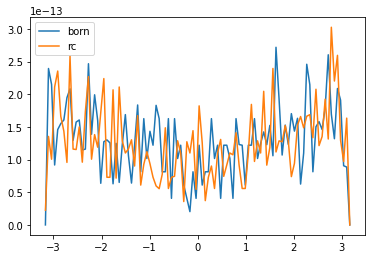

In [18]:
df_born_phi_traditional=pd.read_csv('clas6/out_clas6_born_phi.txt',delim_whitespace=True)
df_born_phi_traditional.head()
df_rc_phi_traditional=pd.read_csv('clas6/out_clas6_rc_phi.txt',delim_whitespace=True)
df_rc_phi_traditional.head()

phis_born_traditional = df_born_phi_traditional['phi']
xss_phi_born_traditional = df_born_phi_traditional['yield']
phis_rc_traditional = df_rc_phi_traditional['phi']
xss_phi_rc_traditional = df_rc_phi_traditional['yield']

plt.plot(phis_born_traditional,xss_phi_born_traditional,label = 'born')
plt.plot(phis_rc_traditional,xss_phi_rc_traditional,label = 'rc')
plt.legend()

In [19]:
#For Q2=2.4,x=0.3,z =0.37,pt2=0.22, this part is for Q2 from 1.6 to 3.2
#The accurate value is Q2=2.37, x = 0.3025,z = 0.3748
df_phi=clas6_data[clas6_data['z']==0.3748][clas6_data['x']==0.3025][clas6_data['Q2']==2.37][clas6_data['pT2']==0.2165]
df_phi


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_67808/3454688585.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_phi=clas6_data[clas6_data['z']==0.3748][clas6_data['x']==0.3025][clas6_data['Q2']==2.37][clas6_data['pT2']==0.2165]


,Q2,x,z,pT2,phi,ds_dxdQ2dzdpT2dphi,stat_err,sys_err,rad_cor
43262,2.37,0.3025,0.3748,0.2165,10.0,0.008034,0.002235,0.000957,0.9483
43263,2.37,0.3025,0.3748,0.2165,30.0,0.008323,0.000506,0.000991,0.9523
43264,2.37,0.3025,0.3748,0.2165,50.0,0.008241,0.000657,0.000981,0.9602
43265,2.37,0.3025,0.3748,0.2165,70.0,0.008909,0.000401,0.001060,0.9723
43266,2.37,0.3025,0.3748,0.2165,90.0,0.008734,0.000260,0.001039,0.9884
43267,2.37,0.3025,0.3748,0.2165,110.0,0.008689,0.000295,0.001034,1.0096
43268,2.37,0.3025,0.3748,0.2165,130.0,0.008214,0.000397,0.000977,1.0350
43269,2.37,0.3025,0.3748,0.2165,150.0,0.008501,0.000322,0.001012,1.0538
43270,2.37,0.3025,0.3748,0.2165,170.0,0.008402,0.000237,0.001000,1.0588
43271,2.37,0.3025,0.3748,0.2165,190.0,0.008054,0.000230,0.000958,1.0588


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_67808/2955366019.py:28: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(phis_axis,xs_before_axis,'o',marker = 'v',color='red',label='No correction')


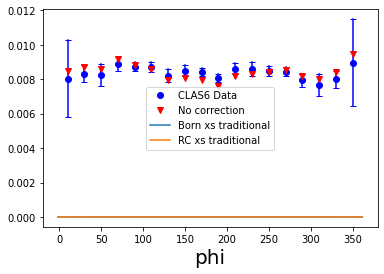

In [20]:

phis = df_phi['phi'].unique()
#print(phis)
phis_axis=[]
xs_axis=[]
xs_before_axis=[]
xs_stat_err_axis=[]
xs_sys_err_axis=[]
fig = plt.figure()
ax = fig.add_subplot()
for i_phi in phis:
    xs = df_phi[df_phi['phi']==i_phi]['ds_dxdQ2dzdpT2dphi']
    rc = df_phi[df_phi['phi']==i_phi]['rad_cor']
    xs_before = xs/rc
    #print(xs_before)
    #print(xs)
    xs_stat_err = df_phi[df_phi['phi']==i_phi]['stat_err']
    xs_sys_err = df_phi[df_phi['phi']==i_phi]['sys_err']
    phis_axis.append(i_phi)
    xs_axis.append(xs)
    xs_before_axis.append(xs_before)
    xs_stat_err_axis.append(xs_stat_err)
    xs_sys_err_axis.append(xs_sys_err)
    ax.plot([i_phi,i_phi],[xs-xs_stat_err,xs+xs_stat_err],color='blue',marker='_')

    
#ax.fill_between(phis_axis,np.asarray(xs_axis)-np.asarray(xs_sys_err_axis),np.asarray(xs_axis)+np.asarray(xs_sys_err_axis),color='blue',alpha=0.25,linewidth=0,label='sys err')
plt.plot(phis_axis,xs_axis,'o',color='blue',label='CLAS6 Data')
plt.plot(phis_axis,xs_before_axis,'o',marker = 'v',color='red',label='No correction')
plt.xlabel('phi',fontsize=20)


plt.plot((np.asarray(phis_born_traditional)+3.14)*180/3.14,np.asarray(xss_phi_born_traditional)*Factor,'-',label='Born xs traditional')
plt.plot((np.asarray(phis_rc_traditional)+3.14)*180/3.14,np.asarray(xss_phi_rc_traditional)*Factor,'-',label='RC xs traditional')
#plt.plot(phis_factorized,xs_rc_factorized,'-',label='Factorized')
#plt.xlim(-3.2,3.2)
#plt.ylim(0,0.02)
plt.legend()

plt.savefig('clas6/compare_phi.pdf')

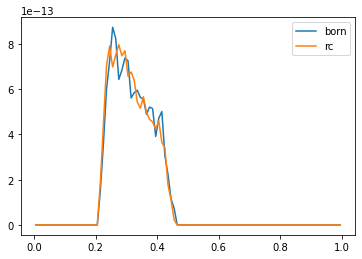

In [21]:
df_born_xb_traditional=pd.read_csv('clas6/out_clas6_born_x.txt',delim_whitespace=True,skiprows=[0])
df_born_xb_traditional.head()
df_rc_xb_traditional=pd.read_csv('clas6/out_clas6_rc_x.txt',delim_whitespace=True,skiprows=[0])
df_rc_xb_traditional.head()

xbs_born_traditional = df_born_xb_traditional['x']
xss_xb_born_traditional = df_born_xb_traditional['yield']
xbs_rc_traditional = df_rc_xb_traditional['x']
xss_xb_rc_traditional = df_rc_xb_traditional['yield']

plt.plot(xbs_born_traditional,xss_xb_born_traditional,label = 'born')
plt.plot(xbs_rc_traditional,xss_xb_rc_traditional,label = 'rc')
plt.legend()

In [22]:
#For x=2.4,x=0.3,z =0.37,pt2=0.22, this part is for x from 1.6 to 3.2
#The accurate value is Q2=2.37, x = 0.3025,z = 0.3748
df_x=clas6_data[clas6_data['z']==0.3748][clas6_data['Q2']==2.37][clas6_data['pT2']==0.2165]
df_x


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_67808/200124894.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_x=clas6_data[clas6_data['z']==0.3748][clas6_data['Q2']==2.37][clas6_data['pT2']==0.2165]


,Q2,x,z,pT2,phi,ds_dxdQ2dzdpT2dphi,stat_err,sys_err,rad_cor
38953,2.37,0.2362,0.3748,0.2165,10.0,0.019239,0.004296,0.002259,0.9924
38954,2.37,0.2362,0.3748,0.2165,30.0,0.009315,0.001437,0.001093,0.9948
38955,2.37,0.2362,0.3748,0.2165,50.0,0.009587,0.001174,0.001125,0.9995
38956,2.37,0.2362,0.3748,0.2165,70.0,0.011260,0.001900,0.001320,1.0063
38957,2.37,0.2362,0.3748,0.2165,90.0,0.007930,0.000759,0.000930,1.0146
...,...,...,...,...,...,...,...,...,...
53803,2.37,0.5397,0.3748,0.2165,270.0,0.002744,0.000254,0.000365,1.0456
53804,2.37,0.5397,0.3748,0.2165,290.0,0.003082,0.000275,0.000410,0.9447
53805,2.37,0.5397,0.3748,0.2165,310.0,0.002389,0.000444,0.000318,0.8935
53806,2.37,0.5397,0.3748,0.2165,330.0,0.002169,0.000483,0.000289,0.8644


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_67808/4290617261.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  xs = df_x[df_x['x']==i_xb][df_x['phi']==i_phi]['ds_dxdQ2dzdpT2dphi']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_67808/4290617261.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rc = df_x[df_x['x']==i_xb][df_x['phi']==i_phi]['rad_cor']


[0.2362 0.2686 0.3025 0.3379 0.3748 0.4134 0.4537 0.4958 0.5397]


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_67808/4290617261.py:35: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(xbs_axis,xs_before_axis,'o',marker = 'v',color='red',label='No correction')


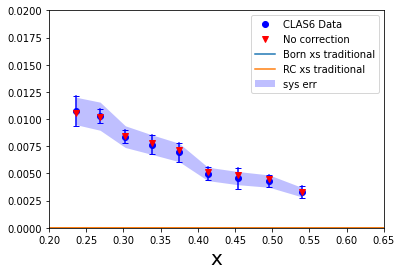

In [23]:

xbs = df_x['x'].unique()
print(xbs)
xbs_axis=[]
xs_axis=[]
xs_before_axis=[]
xs_stat_err_axis=[]
xs_sys_err_axis=[]
fig = plt.figure()
ax = fig.add_subplot()
for i_xb in xbs:
    
    phis = df_x[df_x['x']==i_xb]['phi']
    xs_phis = []
    xs_before_phis = []
    for i_phi in phis:
        xs = df_x[df_x['x']==i_xb][df_x['phi']==i_phi]['ds_dxdQ2dzdpT2dphi']
        rc = df_x[df_x['x']==i_xb][df_x['phi']==i_phi]['rad_cor']
        xs_phis.append(xs)
        xs_before_phis.append(xs/rc)
    #rc = df_x[df_x['z']==i_z]['rad_cor']
    xs = np.mean(xs_phis)
    xs_before = np.mean(xs_before_phis)
    #print(xs)
    xs_stat_err = df_x[df_x['x']==i_xb]['stat_err'].mean()
    xs_sys_err = df_x[df_x['x']==i_xb]['sys_err'].mean()
    xbs_axis.append(i_xb)
    xs_axis.append(xs)
    xs_before_axis.append(xs_before)
    xs_stat_err_axis.append(xs_stat_err)
    xs_sys_err_axis.append(xs_sys_err)
    ax.plot([i_xb,i_xb],[xs-xs_stat_err,xs+xs_stat_err],color='blue',marker='_')

ax.fill_between(xbs_axis,np.asarray(xs_axis)-np.asarray(xs_sys_err_axis),np.asarray(xs_axis)+np.asarray(xs_sys_err_axis),color='blue',alpha=0.25,linewidth=0,label='sys err')
plt.plot(xbs_axis,xs_axis,'o',color='blue',label='CLAS6 Data')
plt.plot(xbs_axis,xs_before_axis,'o',marker = 'v',color='red',label='No correction')
plt.xlabel('x',fontsize=20)


plt.plot(xbs_born_traditional,np.asarray(xss_xb_born_traditional)*Factor,'-',label='Born xs traditional')
plt.plot(xbs_rc_traditional,np.asarray(xss_xb_rc_traditional)*Factor,'-',label='RC xs traditional')
#plt.plot(xbs_factorized,xs_rc_factorized,'-',label='Factorized')
plt.xlim(0.2,0.65)
plt.ylim(0,0.02)
plt.legend()

plt.savefig('clas6/compare_xb.pdf')